**Video-https://drive.google.com/drive/folders/1BNr6qNrrvnACIRRyT3iacldghBtIjmqg?usp=sharing**

**ROLL NO- 22b1266**


**Sources-chat gpt ,geeks for geeks**


link of geeks for geeks  -k-means-https://www.geeksforgeeks.org/k-means-clustering-introduction/

dbscan-https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/




**Question 1.**

**1(a)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer



In [3]:
data=pd.read_csv("/content/Customer-Data - 2.csv")

In [5]:
data.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


In [230]:
print(data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [5]:
data = data.drop(columns=["MINIMUM_PAYMENTS"], axis=1)
data = data.drop(columns=["CUST_ID"], axis=1)

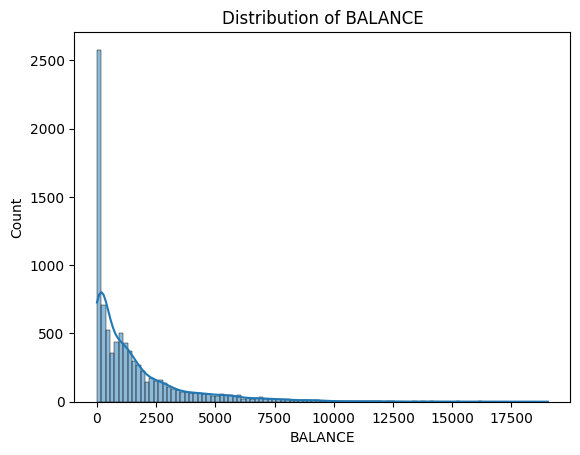

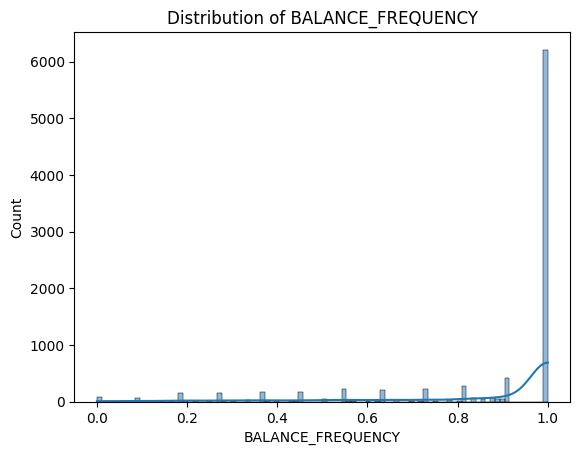

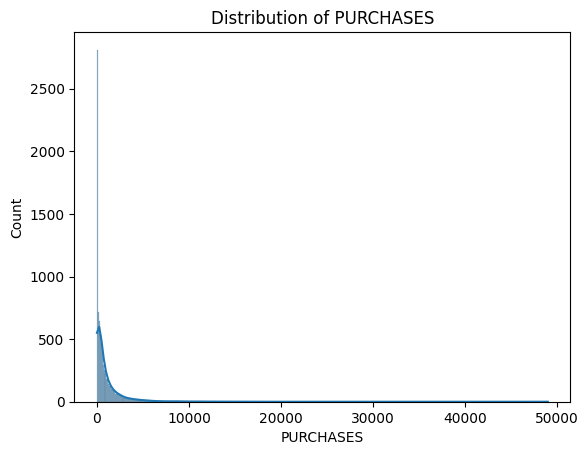

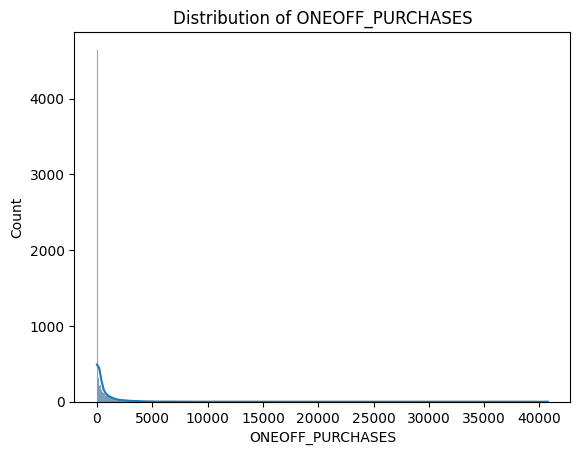

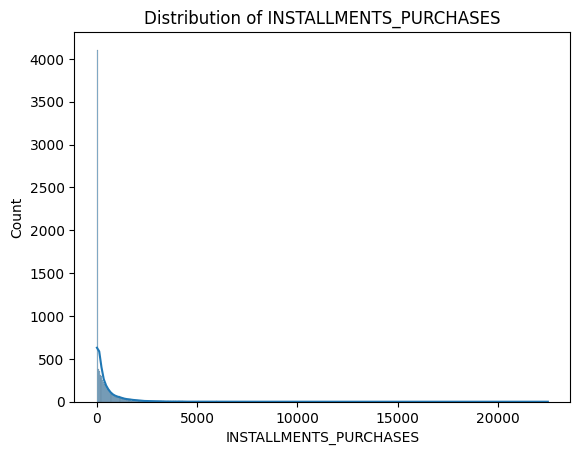

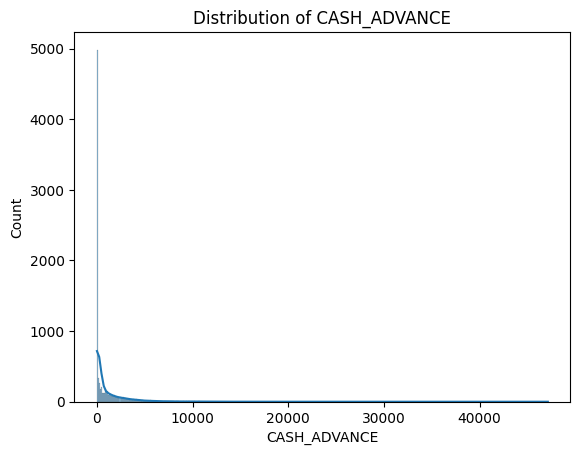

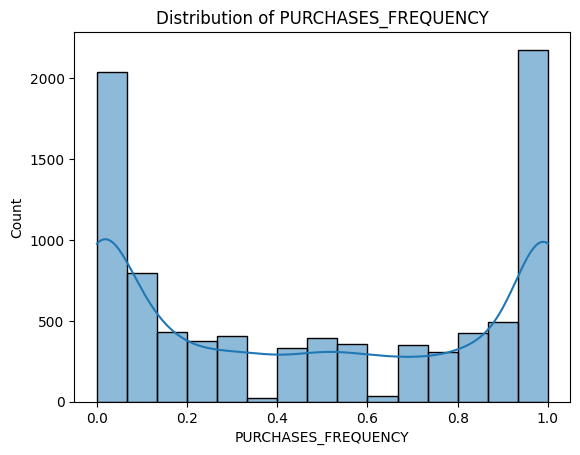

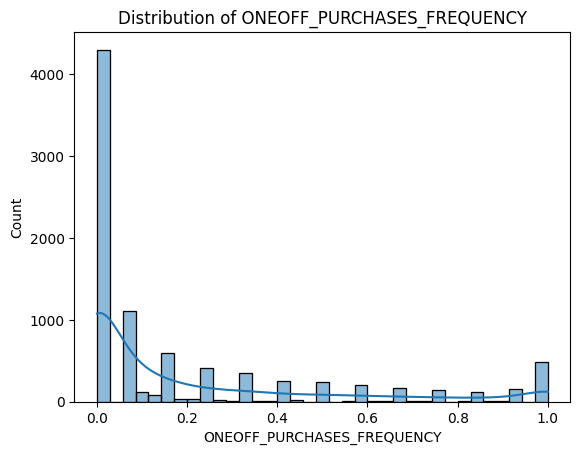

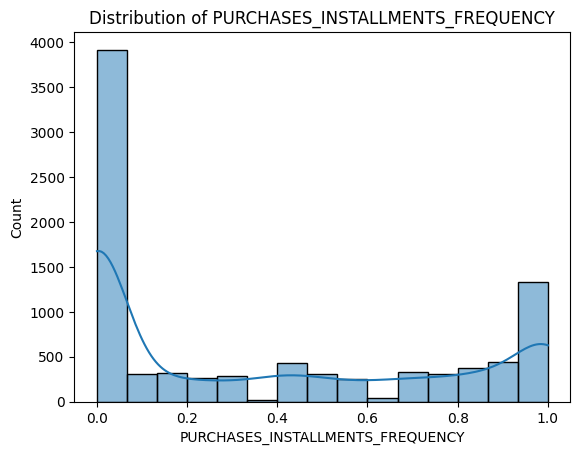

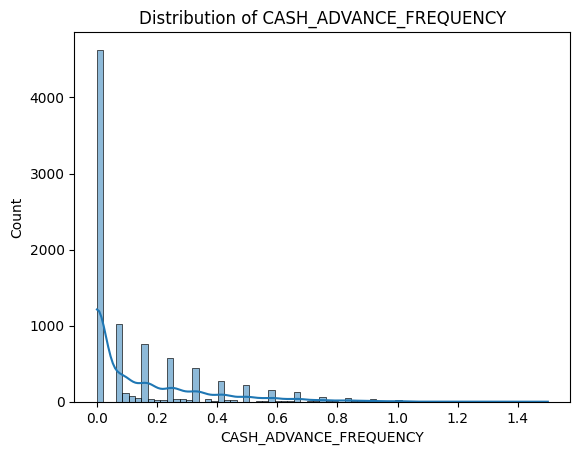

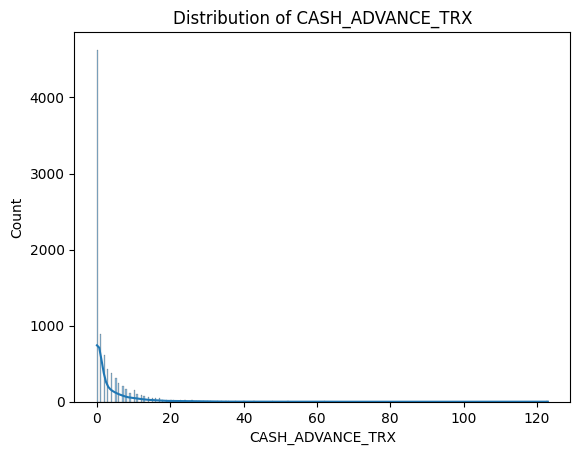

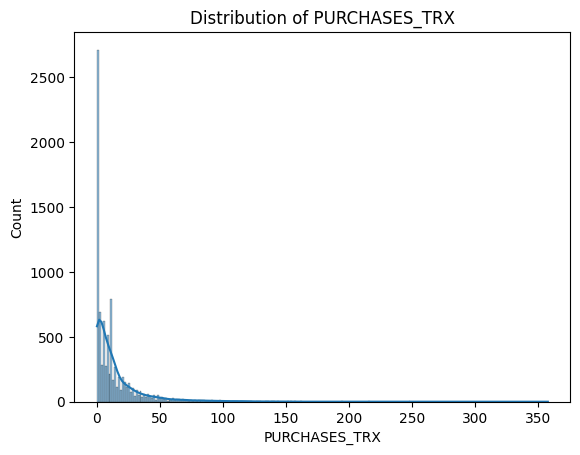

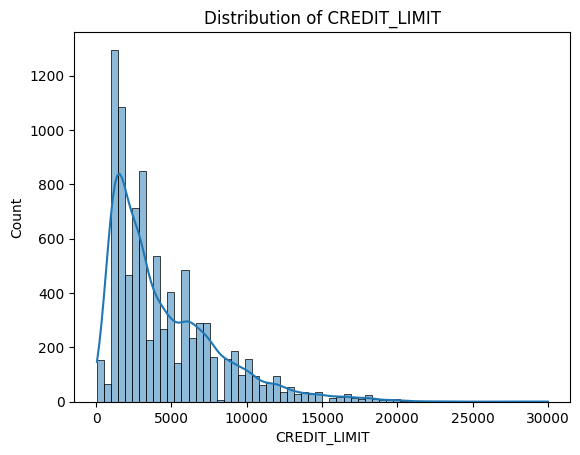

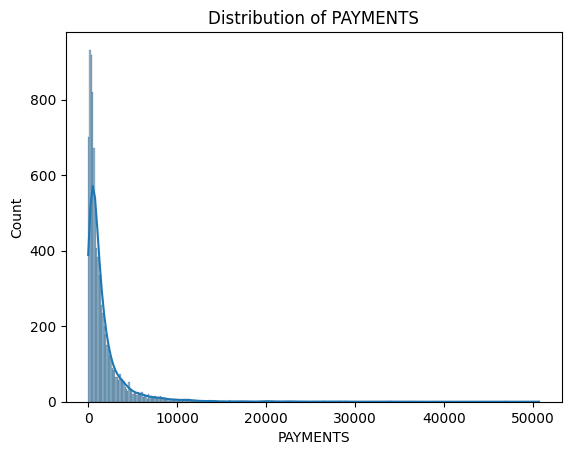

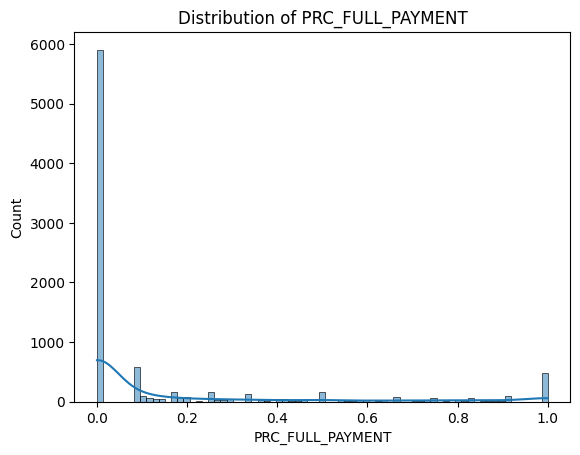

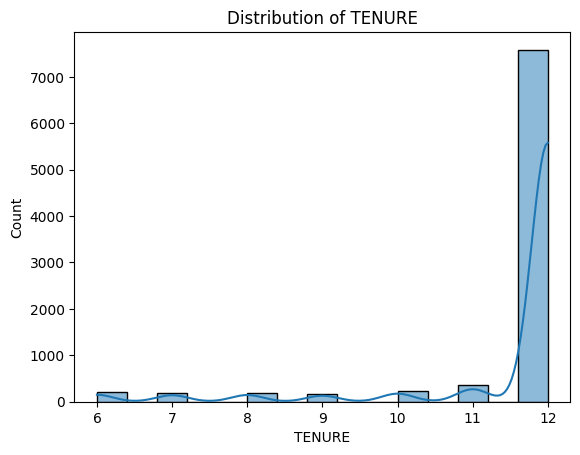

In [15]:
for col in data.columns:
    if data[col].dtype=="float" or data[col].dtype=="int":
        sns.histplot(data[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

In [6]:
data.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [4]:
data = data.dropna(subset=['CREDIT_LIMIT'])


In [228]:
skewed_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE']
for feature in skewed_features:
    data[feature] = np.log1p(data[feature])

In [188]:
print(data[['BALANCE']])

       BALANCE
0     3.735304
1     8.071989
2     7.822504
3     7.419183
4     6.707735
...        ...
8945  3.384170
8946  3.004851
8947  3.194529
8948  2.671218
8949  5.923475

[8949 rows x 1 columns]


In [189]:
power_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
data[skewed_features] = power_transformer.fit_transform(data[skewed_features])

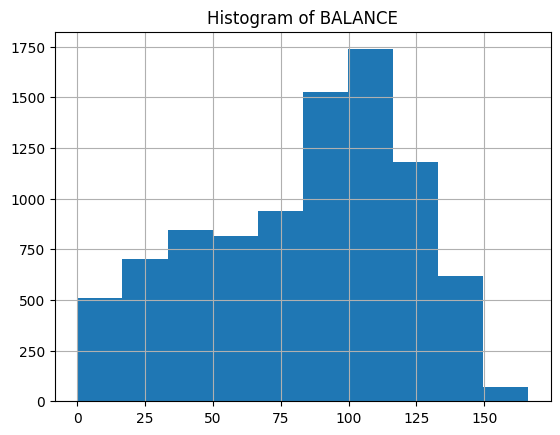

In [29]:
data[skewed_features].skew()
data['BALANCE'].hist()
plt.title('Histogram of BALANCE')
plt.show()

**1(b)**

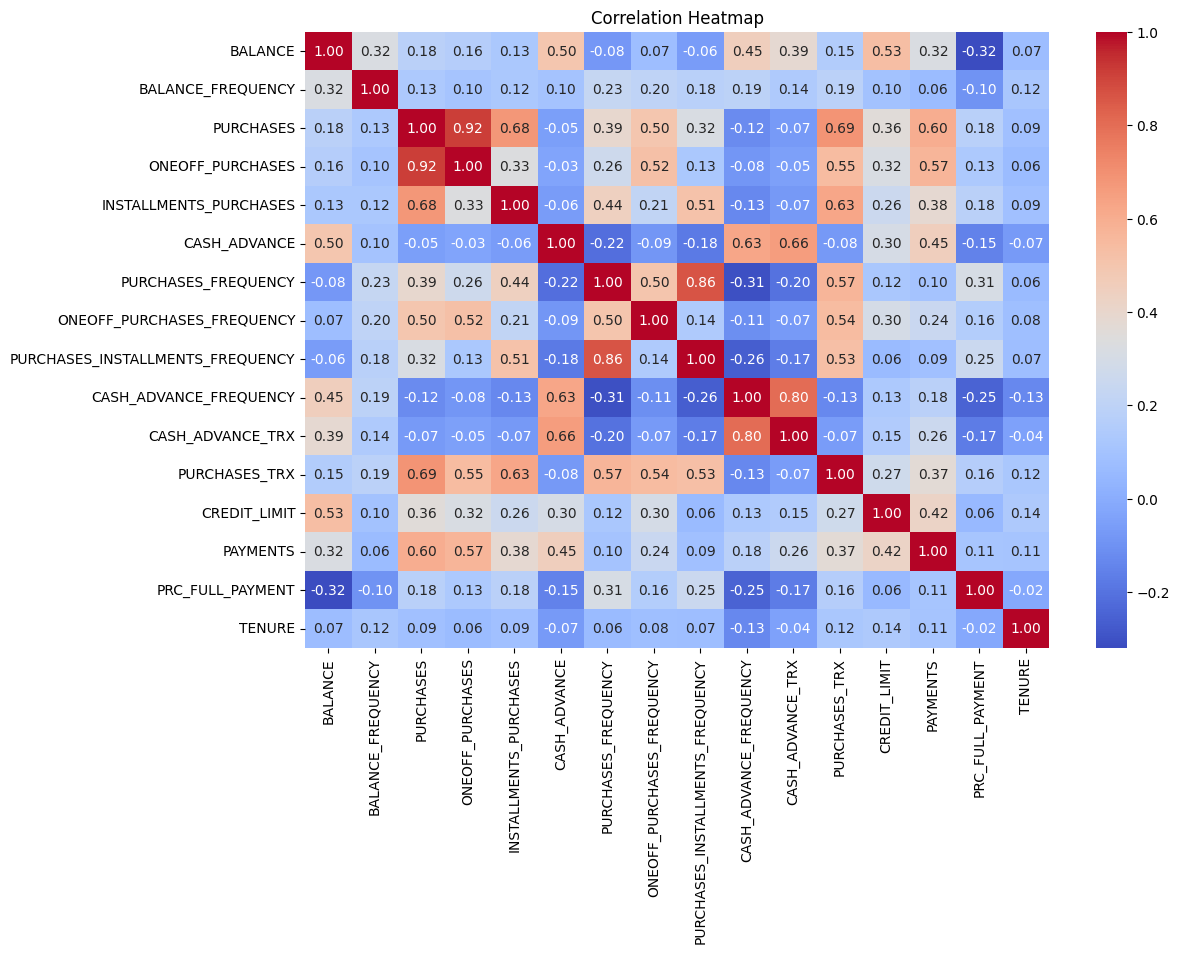

In [24]:
data1 = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = data1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [25]:
threshold = 0.8

high_corr_var = np.where(abs(corr_matrix) > threshold)
high_corr_pairs = [(data1.columns[x], data1.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print("Highly Correlated Pairs:")
for pair in high_corr_pairs:
    print(pair)

columns_to_drop = set()
for pair in high_corr_pairs:
    columns_to_drop.add(pair[1])

data1 = data1.drop(columns=columns_to_drop)

Highly Correlated Pairs:
('PURCHASES', 'ONEOFF_PURCHASES')
('PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY')


Here i dropped the one of the colums which were highly correlated as the will have same feature i used threshold of dropping it as 0.8

In [9]:
nan_values = data1.isna().sum()
print(nan_values)


BALANCE                       0
BALANCE_FREQUENCY             0
PURCHASES                     0
INSTALLMENTS_PURCHASES        0
CASH_ADVANCE                  0
PURCHASES_FREQUENCY           0
ONEOFF_PURCHASES_FREQUENCY    0
CASH_ADVANCE_FREQUENCY        0
PURCHASES_TRX                 0
CREDIT_LIMIT                  0
PAYMENTS                      0
PRC_FULL_PAYMENT              0
TENURE                        0
dtype: int64


In [282]:
data1.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0
PURCHASES_TRX,0
CREDIT_LIMIT,0


In [26]:

for col in data1.columns :
  data1[col] = np.log(data1[col] + 0.01)



In [27]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1)

In [237]:
data1.dtypes

,0
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
CASH_ADVANCE_FREQUENCY,float64
PURCHASES_TRX,float64
CREDIT_LIMIT,float64


**Question2.**

**2(a)**

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [28]:
inertia = []
silhouette_scores = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    if k>1:
      silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))


In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
data1['kmeans_cluster'] = kmeans.fit_predict(data1)

print("Cluster centers:")
print(kmeans.cluster_centers_)

Cluster centers:
[[ 6.94783666 -0.18958114 -4.5920434  -4.59716889  6.84871505 -4.59438473
  -4.59610883 -1.49605217  1.34322121 -4.57974713  7.98897992  6.37040757
  -4.04670495  2.41557031]
 [ 5.1088611  -0.29090339  6.36466884  3.51727904 -4.60517019 -0.60585414
  -2.51815961 -4.60517019 -4.60517019  2.33362951  8.072023    6.29673552
  -2.90143331  2.44762735]
 [ 7.33472398 -0.05652427  6.322747    2.2465879   6.88506038 -0.80619876
  -2.01143633 -1.45343715  1.44498484  2.20016331  8.23524298  7.02595909
  -3.89917895  2.4298264 ]]


Text(0, 0.5, 'Inertia')

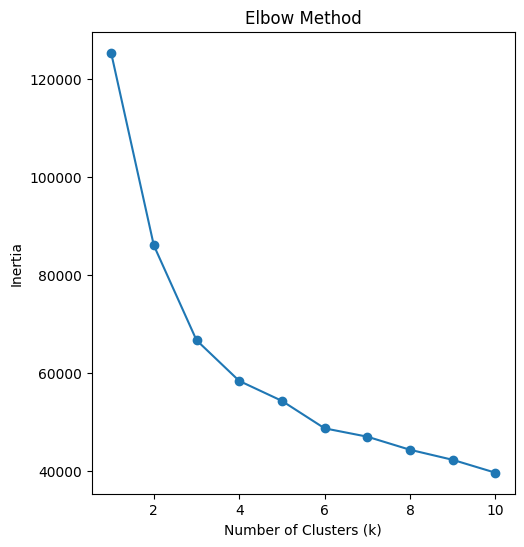

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')


Text(0, 0.5, 'Silhouette Score')

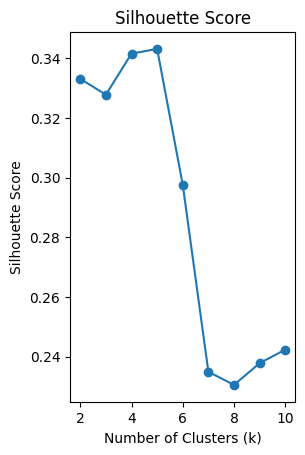

In [31]:
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

As we can see from the graph that the k value can be chosen as 3 as silhouette score is high on 3 and also the elbow got a slope change at the that value

**2(b) & (c)**

In [373]:
minpts_values = [5,7,20,30]
eps_values = [0.3, 0.5, 0.7]

dbscan_results = {}


In [34]:
eps_value = 0.3
min_samples_value = 7
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
data1['dbscan_cluster'] = dbscan.fit_predict(data1)

# Review the number of clusters (including noise as label -1)
print(f"Number of clusters found: {len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)}")
print(f"Number of noise points (labeled as -1): {(dbscan.labels_ == -1).sum()}")


Number of clusters found: 2
Number of noise points (labeled as -1): 8913


DBscan is also coming as 3 cluster for the optimal value of m ans e

In [23]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data1)

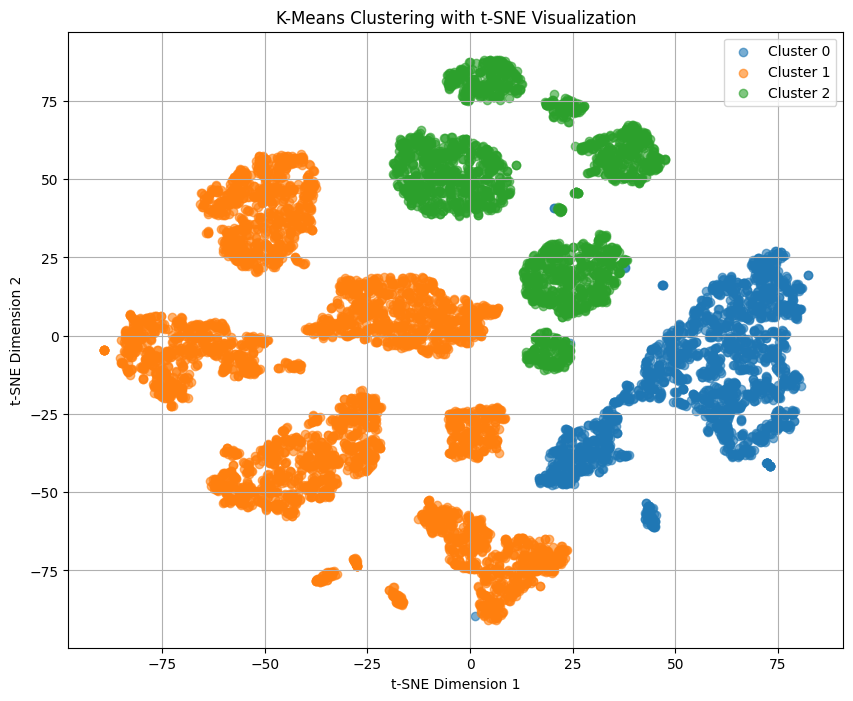

In [360]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data1.drop(columns=['kmeans_cluster']))

data1['tsne_1'] = tsne_results[:, 0]
data1['tsne_2'] = tsne_results[:, 1]


plt.figure(figsize=(10, 8))
for cluster in range(3):
    subset = data1[data1['kmeans_cluster'] == cluster]
    plt.scatter(subset['tsne_1'], subset['tsne_2'], label=f"Cluster {cluster}", alpha=0.6)

plt.title("K-Means Clustering with t-SNE Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.grid()
plt.show()

**2(d)**

In [35]:
data['dbscan_cluster'] = data1['dbscan_cluster']
cluster_summary_original = data.groupby('dbscan_cluster').mean()
print(cluster_summary_original)

                    BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
dbscan_cluster                                                                  
-1              1565.932259           0.876855  1006.925758        594.896721   
 0              1310.151351           1.000000     0.000000          0.000000   
 1              1024.105584           1.000000   494.235000          0.000000   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
dbscan_cluster                                                              
-1                          412.330477    982.655844             0.491498   
 0                            0.000000     82.073771             0.000000   
 1                          494.235000      0.000000             0.989583   

                ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
dbscan_cluster                                                                 
-1                                0.203298      

Cluster -1: "Moderate Spenders"
,Balance: Moderate ($1565.93)
,Purchases: Active ($1006.93, mix of one-off and installment purchases)

Cluster 0: "Inactive Users"
,Balance: Low ($1310.15)
,Purchases: Zero.

Cluster 1: "Installment Shoppers"
,Balance: Low ($1024.10)
,Purchases: Moderate ($494.24), entirely through installments.

**Question3.**

**3(a)**

In [316]:
from sklearn.preprocessing import StandardScaler

features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'TENURE', 'CASH_ADVANCE', 'PURCHASES_TRX', 'PAYMENTS']

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[features])



In [372]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_normalized)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.39331923 0.2202935  0.1420202  0.10113145 0.06919124 0.04917297
 0.0248714 ]


**3(b)**

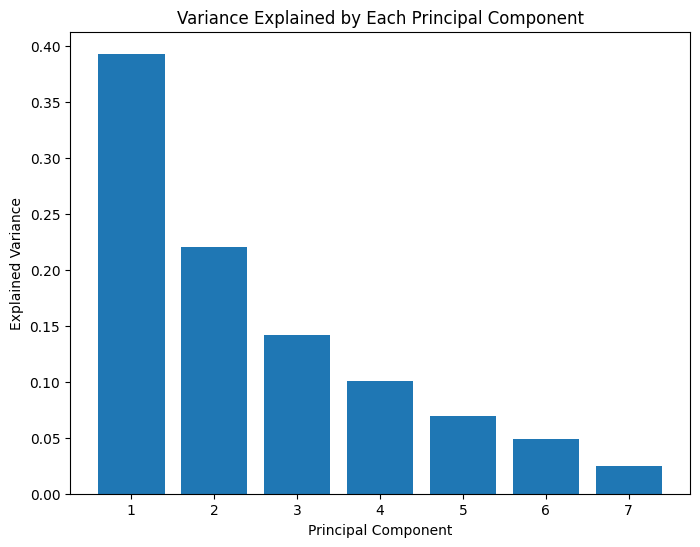

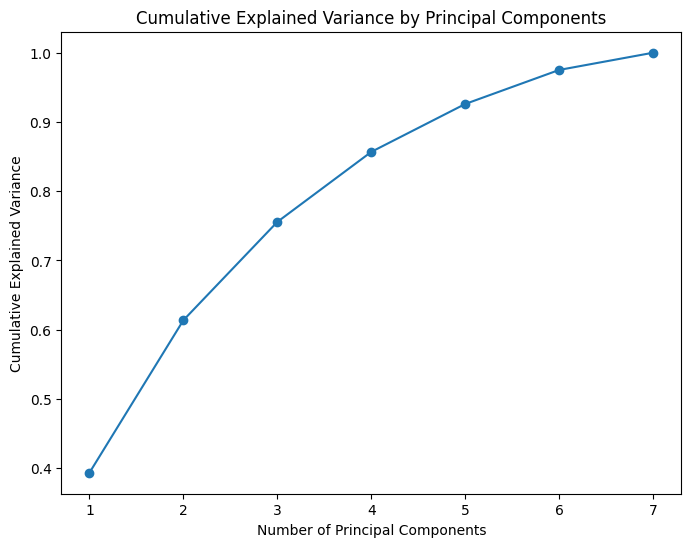

In [318]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Variance Explained by Each Principal Component')
plt.show()

cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

**3(c)**

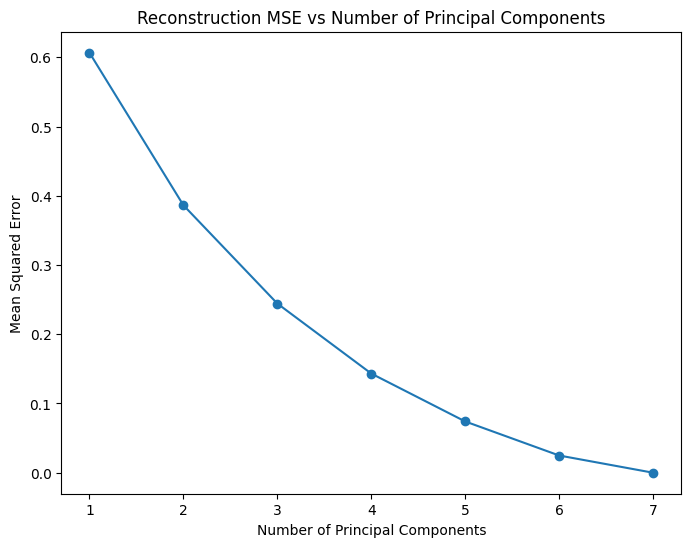

In [320]:
n_components_range = range(1, len(features) + 1)
from sklearn.metrics import mean_squared_error

mse_values = []
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    data_reduced = pca.fit_transform(data_normalized)
    data_reconstructed = pca.inverse_transform(data_reduced)
    mse = mean_squared_error(data_normalized, data_reconstructed)
    mse_values.append(mse)


plt.figure(figsize=(8, 6))
plt.plot(n_components_range, mse_values, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')
plt.title('Reconstruction MSE vs Number of Principal Components')
plt.show()

The graph is decreasing because as the number of principal components increases, more variance in the data is captured, improving the reconstruction quality. This reduces the information loss, leading to a lower Mean Squared Error (MSE). Initially, with fewer components, MSE is high due to significant data loss